 **Цель**: Получить лучшую точность на Test базе

# 1 Загрузка

In [5]:
import pandas as pd

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7




# Кодирование категориальных данных по принципу One-Hot
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# импорт библиотеки для разделения выборки
from sklearn.model_selection import train_test_split

#УБИРАЕМ ОГРАНИЧЕНИЕ - на количество рядов. !!Аккуратнее с просмотром таблиц
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [6]:
# Загрузка файла из облака в colab
test_file = '/content/drive/MyDrive/Стажировка1/Данные/Test.csv'
train_file = '/content/drive/MyDrive/Стажировка1/Данные/Train.csv'

df_test = pd.read_csv(test_file)
df_train = pd.read_csv(train_file, low_memory=False)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195762 entries, 0 to 195761
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          195738 non-null  object 
 1   city_name                            195738 non-null  object 
 2   population                           195738 non-null  float64
 3   date of birth                        195762 non-null  object 
 4   gender                               195762 non-null  object 
 5   education                            154373 non-null  object 
 6   position                             182587 non-null  object 
 7   dt_nbki                              195762 non-null  object 
 8   id_nbki                              195762 non-null  object 
 9   issued                               195762 non-null  object 
 10  amount                               195762 non-null  float64
 11  currency     

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          1112 non-null   object 
 1   city_name                            1112 non-null   object 
 2   population                           1112 non-null   float64
 3   date of birth                        1112 non-null   object 
 4   gender                               1112 non-null   object 
 5   education                            1112 non-null   object 
 6   position                             1112 non-null   object 
 7   dt_nbki                              1112 non-null   object 
 8   id_nbki                              1112 non-null   object 
 9   issued                               1112 non-null   object 
 10  amount                               1112 non-null   float64
 11  currency                      

# Провека пересечения между классами

In [ ]:
df_clients = df_test[['id_nbki', 'Client_class' ]].drop_duplicates()                    #Cформировала список клиентов с классами, удалив дубликаты
df_clients_test_count = df_clients.groupby(['id_nbki']).count()
df_clients_test_count

df_clients_test_count.loc[((df_clients_test_count['Client_class'] == 2) )]


,Client_class
id_nbki,


In [ ]:
df_clients = df_train[['id_nbki', 'Client_class' ]].drop_duplicates()                    #Cформировала список клиентов с классами, удалив дубликаты
df_clients_train_count = df_clients.groupby(['id_nbki']).count()

df_clients_train_count.loc[((df_clients_train_count['Client_class'] == 2) )]


,Client_class
id_nbki,
60d2728a-043f-11ed-b80c-3cfdfed12971,2
7f0afddd-2b69-11ec-b80b-3cfdfed12971,2
80f745cf-22c7-11ec-b80b-3cfdfed12971,2
adbf8e85-9af1-11ec-b80c-3cfdfed12971,2
cd50a689-b968-11ec-b80c-3cfdfed12971,2
e1dac4f0-723a-11ed-b80c-3cfdfed12971,2


# Анализ данных

In [ ]:
df_train['education'].value_counts(normalize=True, sort = False, dropna = False)*100

Высшее               17.876299
СреднеТехническое    32.109909
Среднее              23.806970
NaN                  21.142510
НесколькоВысших       0.295767
НеполноеВысшее        2.585793
НеполноеСреднее       2.160787
УченаяСтепень         0.021965
Name: education, dtype: float64

In [ ]:
df_train['currency'].value_counts(normalize=True, sort = False, dropna = False)*100

RUB    100.0
Name: currency, dtype: float64

In [ ]:
df_train['position'].value_counts(normalize=True,  dropna = False)*100

рабочий                                   21.258467
пенсионер                                 18.276274
сотрудник малого бизнеса                  10.897927
специалист                                10.116366
NaN                                        6.730111
сотрудники крупного бизнеса                4.995351
работник промышленных предприятий          4.059010
работник бюджетной сферы                   3.665676
прочее                                     3.308099
индивидуальный предприниматель (ип)        2.842227
самозанятый                                2.683871
госслужащий                                2.158233
муниципальный служащий                     2.122475
руководитель                               1.941133
военнослужащий                             1.792483
работник с/х                               1.031354
работник социальной сферы                  0.883215
сотрудник градообразующего предприятия     0.869934
технический специалист                     0.287083
судебная вла

In [ ]:
df_train['type_debt'].value_counts(normalize=True,  dropna = False)*100

NaN                 87.851064
ПоОсновномуДолгу    12.148936
Name: type_debt, dtype: float64

In [ ]:
df_train['type_credit'].value_counts(normalize=True,  dropna = False)*100

Микрокредит                     91.492731
КредитнаяКарта                   3.366333
Потребительский                  3.320869
ДругойТипКредита                 0.825492
Овердрафт                        0.724860
Ипотека                          0.077134
КредитНаличнымиНецелевой         0.053637
КредитНаАвтомобиль               0.049039
ДебетоваяКартаСОвердрафтом       0.037801
NaN                              0.018390
НаПополнениеОборотныхСредств     0.013792
PDLЗайм                          0.004597
НаРазвитиеБизнеса                0.004087
ИпотекаВторичныйРынок            0.003576
НаОбучение                       0.002043
ДоговорПоручительства            0.002043
НаСтроительство                  0.001532
БанковскаяГарантия               0.001532
НаПокупкуОборудования            0.000511
Name: type_credit, dtype: float64

In [ ]:
#df_train['availability_support'].value_counts(normalize=True,  dropna = False)*100
df_test.groupby('availability_support')['Client_class'].value_counts()

availability_support  Client_class
0.0                   1               387
                      2               347
                      4               253
                      3               124
1.0                   3                 1
Name: Client_class, dtype: int64

In [ ]:
df_train.groupby('availability_support')['Client_class'].value_counts(dropna = True)

availability_support  Client_class
0.0                   1               130788
                      4                29964
                      2                24201
                      3                10306
1.0                   1                  198
                      4                   87
                      3                   78
                      2                   44
Name: Client_class, dtype: int64

In [ ]:
df_test['availability_support'].unique()

array([0., 1.])

In [ ]:
df_train.groupby('amount_surety')['Client_class'].value_counts()
#df_train['amount_surety'].value_counts(normalize=True,  dropna = False)*100

amount_surety  Client_class
0.0            1               130972
               4                30076
               2                24260
               3                10377
5100.0         2                    1
5182.0         2                    1
6667.0         2                    2
10000.0        1                    3
               2                    1
11000.0        2                    1
13108.0        1                    1
14027.0        2                    1
14548.0        1                    2
15000.0        2                    2
16593.0        3                    1
19063.0        2                    1
20000.0        4                    1
23999.0        1                    1
26000.0        2                    1
28196.0        2                    1
29410.0        3                    1
30000.0        2                    3
               3                    1
33011.0        3                    1
35000.0        2                    1
               4      

In [ ]:
df_train['period_interest'].unique()

array([nan, '2022-06-02', '2022-07-11', ..., '2024-04-05', '2024-11-02',
       '2025-08-15'], dtype=object)

In [ ]:
df_train.

In [ ]:
  'period_interest',
                           'days_overdue',
                           'last_payment',
                           'volume_commitment',
                           'surety_period',
                           'beginning_days_delinquency_counting'

# 2 Очистка исходных данные

In [ ]:
#Удаляем строки с клиентами, которые относятся сразу к двум классам (что бы не путать НС)
# !!! Фрагмент дважды не запускать !!!
df_clients = df_train[['id_nbki', 'Client_class' ]].drop_duplicates()                    #Cформировала список клиентов с классами, удалив дубликаты
df_clients  = df_clients.groupby(['id_nbki']).count()
df_clients_duplicate = df_clients.loc[((df_clients['Client_class'] == 2) )]            #И выводим id c двумя классами
df_clients_duplicate.columns = [ 'Duplicate_True']
df_clients_duplicate.reset_index(drop= False , inplace= True )                  #Переопределяю индекс (так как без этого у нас будет индекс и 1 столбец)
df_clients_duplicate

df_train = df_train.merge (df_clients_duplicate, how='left', on='id_nbki')             #Добавляю признак дубликата в набор данных

print( df_train['Duplicate_True'].value_counts(), 'Строк к удалению из-за дублированных клиентов')
df_train = df_train[df_train['Duplicate_True'] != 2 ]                                   #Удаляем по условию строки, все, что не равно 2
df_train = df_train.drop(['Duplicate_True' ], axis='columns')                         #Удаляем наш столбец
df_train.shape

2.0    78
Name: Duplicate_True, dtype: int64 Строк к удалению из-за дублированных клиентов


(195684, 42)

In [ ]:
#education

# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'НесколькоВысших': 'Высшее',
    'НеполноеВысшее': 'Высшее',
    'УченаяСтепень': 'Высшее',
    'НеполноеСреднее': 'Среднее'
}
df_train['education'] = df_train['education'].replace(replace_dict)
df_test['education'] = df_test['education'].replace(replace_dict)


df_train['education'] = df_train['education']. fillna ('Среднее')
df_test['education'] = df_test['education']. fillna ('Среднее')

In [ ]:
df_train['education'].value_counts(normalize=True, sort = False, dropna = False)*100

Высшее               20.775843
СреднеТехническое    32.095113
Среднее              47.129045
Name: education, dtype: float64

In [ ]:
df_test['education'].value_counts(normalize=True, sort = False, dropna = False)*100

Высшее               13.579137
СреднеТехническое    63.758993
Среднее              22.661871
Name: education, dtype: float64

In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'государственные служащие высоких чинов': 'госслужащий',
    'самозанятый': 'индивидуальный предприниматель (ип)',
    'судебная власть, права человека': 'госслужащий',
    'технический специалист': 'специалист',
    'работник социальной сферы': 'муниципальный служащий',
    'работник с/х':'прочее',
    'сотрудник градообразующего предприятия':'прочее',
    'военнослужащий':'прочее',
    'разнорабочий': 'рабочий',
    'сварщик': 'рабочий',
    'водитель': 'рабочий',
    'руководитель': 'прочее',
    'госслужащий': 'служащий',
    'работник бюджетной сферы': 'служащий',
    'муниципальный служащий': 'служащий',
    'работник промышленных предприятий': 'сотрудники крупного бизнеса'
}

df_train['position'] = df_train['position'].replace(replace_dict)
df_test['position'] = df_test['position'].replace(replace_dict)

#Пустые значения заполняем
df_train['position'] = df_train['position']. fillna ('прочее')
df_test['position'] = df_test['position']. fillna ('прочее')


In [ ]:
df_train['position'].value_counts(normalize=True, sort = False, dropna = False)*100

служащий                                7.921956
сотрудники крупного бизнеса             9.048773
пенсионер                              18.282537
рабочий                                21.271540
прочее                                 15.679361
специалист                             10.407596
сотрудник малого бизнеса               10.902271
индивидуальный предприниматель (ип)     5.528301
муниципальный служащий                  0.883567
госслужащий                             0.074099
Name: position, dtype: float64

In [ ]:
df_test['position'].value_counts(normalize=True, sort = False, dropna = False)*100

пенсионер                              22.931655
муниципальный служащий                  1.708633
сотрудник малого бизнеса               18.974820
рабочий                                 9.352518
прочее                                  2.428058
индивидуальный предприниматель (ип)     6.384892
специалист                             17.535971
сотрудники крупного бизнеса            10.881295
служащий                                9.802158
Name: position, dtype: float64

In [ ]:
#type_credit
# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'ИпотекаВторичныйРынок': 'ДругойТипКредита',
    'ИпотекаПервичныйРынок': 'ДругойТипКредита',
    'Ипотека': 'ДругойТипКредита',
    'ДебетоваяКартаСОвердрафтом': 'КредитнаяКарта',
    'НаОбучение': 'ДругойТипКредита',
    'НаСтроительство': 'ДругойТипКредита',
    'PDLЗайм': 'ДругойТипКредита',
    'БанковскаяГарантия': 'ДругойТипКредита',
    'ДоговорПоручительства': 'ДругойТипКредита',
    'НаРазвитиеБизнеса': 'ДругойТипКредита',
    'НаПополнениеОборотныхСредств': 'ДругойТипКредита',
    'Овердрафт': 'ДругойТипКредита',
    'КредитНаАвтомобиль': 'ДругойТипКредита',
    'КредитНаличнымиНецелевой': 'ДругойТипКредита',
    'НаПокупкуОборудования': 'ДругойТипКредита'
}

df_train['type_credit'] = df_train['type_credit'].replace(replace_dict)
df_test['type_credit'] = df_test['type_credit'].replace(replace_dict)

df_train['type_credit'] = df_train['type_credit']. fillna ('ДругойТипКредита')
df_test['type_credit'] = df_test['type_credit']. fillna ('ДругойТипКредита')



In [ ]:
df_train['type_credit'].value_counts(normalize=True, sort = False, dropna = False)*100

Микрокредит         91.495472
Потребительский      3.319127
КредитнаяКарта       3.403446
ДругойТипКредита     1.781955
Name: type_credit, dtype: float64

In [ ]:
df_test['type_credit'].value_counts(normalize=True, sort = False, dropna = False)*100

Микрокредит         89.748201
КредитнаяКарта       5.035971
Потребительский      4.586331
ДругойТипКредита     0.629496
Name: type_credit, dtype: float64

In [ ]:
#status_credit

#Удаляем записи с пустым статусом
df_train = df_train.dropna (subset=['status_credit'])

# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'СчетЗакрыт': 1,
    'Активный': 2,
    'Просрочен': 0,
    'ПереданНаОбслуживаниеВДругуюОрганизацию': 0,
    'ПередачаДанныхПрекращена': 0,
    'ПроблемыСВозвратом': 0,
    'СписанСБаланса': 0,
    'Рефинансирован': 0,
    'Банкротство': 0,
    'ОплаченЗаСчетОбеспечения': 0,
    'Спор': 0,
    'ПринудительноеИсполнение':0,
    'Расторгнут': 0
}
df_train['status_credit_num'] = df_train['status_credit'].replace(replace_dict)
df_test['status_credit_num'] = df_test['status_credit'].replace(replace_dict)


#df_train['status_credit_num'] = df_train['type_credit']. fillna (0)
#df_test['status_credit_num'] = df_test['type_credit']. fillna (0)

In [ ]:
df_train['status_credit_num'].value_counts(normalize=True, sort = False, dropna = True)*100

1    71.119663
2    21.891897
0     6.988439
Name: status_credit_num, dtype: float64

In [ ]:
df_test['status_credit_num'].value_counts(normalize=True, sort = False, dropna = True)*100

1    64.748201
0    11.960432
2    23.291367
Name: status_credit_num, dtype: float64

In [ ]:
df_train = df_train.drop([ 'currency',
                        'type_debt',
                         'region_name',
                          'city_name',
                          'period_interest',
                           'days_overdue',
                           'volume_commitment',
                           'surety_period',
                           'beginning_days_delinquency_counting'
                                         ],
                                          axis='columns')
df_test = df_test.drop([ 'currency',
                        'type_debt',
                         'region_name',
                          'city_name',
                          'period_interest',
                           'days_overdue',
                           'volume_commitment',
                           'surety_period',
                           'beginning_days_delinquency_counting'
                                      ],
                                          axis='columns')

In [ ]:
#Удаляю строки с пустой датой статуса кредита
df_train = df_train.dropna (subset=['date_credit_state'])

In [ ]:
# преобразование в пандосовский тип дат
df_train["period"] = pd.to_datetime(df_train["period"], errors='coerce').fillna("2099-12-31 00:00:00")
df_test["period"] = pd.to_datetime(df_test["period"], errors='coerce').fillna("2099-12-31 00:00:00")


<ipython-input-160-ff7a8fd67729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["period"] = pd.to_datetime(df_train["period"], errors='coerce').fillna("2099-12-31 00:00:00")


In [ ]:
#Убираю все кредиты у котрых период до 2021 года (так как у нас их выдали только в 2021 согласно уловию отбора)
df_train = df_train.loc[((df_train['period'].dt.year >= 2021 ) )]
df_test = df_test.loc[((df_test['period'].dt.year >= 2021 ) )]

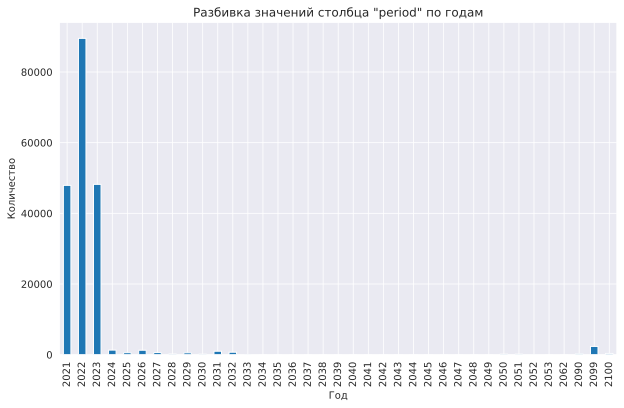

In [ ]:
# Разбивка значений столбца 'period' по годам и подсчет количества
yearly_counts1 = df_train['period'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "period" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
yearly_counts1

2021    47919
2022    89518
2023    48207
2024     1295
2025      568
2026     1261
2027      610
2028      184
2029      529
2030      145
2031      980
2032      706
2033       64
2034        1
2035        1
2036       15
2037       15
2038        3
2039        5
2040        7
2041        9
2042       16
2043        2
2044        3
2045        7
2046       10
2047       12
2048        5
2049        7
2050      155
2051      148
2052       57
2053        1
2062        1
2090      241
2099     2337
2100      368
Name: period, dtype: int64

In [ ]:
df_train['date of birth'] = pd.to_datetime(df_train['date of birth'])
df_test['date of birth'] = pd.to_datetime(df_test['date of birth'])

In [ ]:
df_train['issued'] = pd.to_datetime(df_train['issued'])
df_test['issued'] = pd.to_datetime(df_test['issued'])

In [ ]:
df_train['updated'] = pd.to_datetime(df_train['updated'])
df_test['updated'] = pd.to_datetime(df_test['updated'])

In [ ]:
df_train['date_credit_state'] = pd.to_datetime(df_train['date_credit_state'])
df_test['date_credit_state'] = pd.to_datetime(df_test['date_credit_state'])

In [ ]:
df_train['last_payment'] = pd.to_datetime(df_train['last_payment'])
df_test['last_payment'] = pd.to_datetime(df_test['last_payment'])

In [ ]:
df_train = df_train.drop([ 'dt_nbki'   ], axis='columns')
df_test = df_test.drop([ 'dt_nbki'   ], axis='columns')


In [ ]:
df_train = df_train.drop([ 'updated'   ], axis='columns')
df_test = df_test.drop([ 'updated'   ], axis='columns')

In [ ]:
#Убираем колонки, связанные с поручительством . Все равно в тестовой их нет
df_train = df_train.drop([ 'amount_surety'  ], axis='columns')
df_test = df_test.drop([ 'amount_surety'  ], axis='columns')

# 3 Деление выборки на тестовую и валидационную

In [ ]:
#Из нашего набора данных отбираю атрибуты Клиента (а не кредита) и удаляю дубликаты
df_clients = df_train[[ 'id_nbki',  'date of birth' , 'gender', 'education', 'position','Client_class' ]].drop_duplicates()
df_clients.head(5)

,id_nbki,date of birth,gender,education,position,Client_class
0,27ab5815-bb2d-11ed-b80d-3cfdfed12971,1980-07-28,Женский,Высшее,служащий,1
10,fb3f3545-babd-11ed-80cf-f4034344a6bd,1990-04-22,Мужской,СреднеТехническое,сотрудники крупного бизнеса,1
25,a9487473-df89-11ed-b80d-3cfdfed12971,1991-01-09,Мужской,Среднее,пенсионер,1
42,7a4abc96-dea6-11ed-b80d-3cfdfed12971,1980-09-04,Мужской,СреднеТехническое,рабочий,1
52,6d788c8c-f394-11ec-b80c-3cfdfed12971,1987-01-13,Женский,Высшее,прочее,1


In [ ]:
df_train.shape

(195412, 31)

In [ ]:
#Делю клиентов на 2 выборки - тестовую и валидационную 80/20
df_clients_train, df_clients_val = train_test_split(df_clients,              # ----------------- датасет с клиентами
                                     test_size = 0.1,                        # --- процент тестовых значений
                                     shuffle=True,                           # ------ перемешивание
                                     random_state=50)                        # ---

In [ ]:
#Теперь из части валидационной выборки беру только первые 20 записей, что бы выборка была равна тествой (остальные отправляем в обучающую)
df_clients_val1 = df_clients_val.loc[((df_clients_val['Client_class'] == 1) )][:20]
df_clients_val2 = df_clients_val.loc[((df_clients_val['Client_class'] == 2) )][:20]
df_clients_val3 = df_clients_val.loc[((df_clients_val['Client_class'] == 3) )][:20]
df_clients_val4 = df_clients_val.loc[((df_clients_val['Client_class'] == 4) )][:20]

#И формирую из него единый файл
df_clients_val_all = pd.concat( [df_clients_val1, df_clients_val2, df_clients_val3, df_clients_val4])
df_clients_val_all['Validation'] = 1

#И ставлю признак, что попадет в тествую выборку
df_train = df_train.merge(df_clients_val_all[['id_nbki', 'Validation']], on = 'id_nbki', how='left')

In [ ]:
df_train.shape

(195412, 32)

# Частотный анализ относительно целевой переменной

<Axes: title={'center': 'Число записей по классам'}, xlabel='Класс', ylabel='Кол-во строк'>

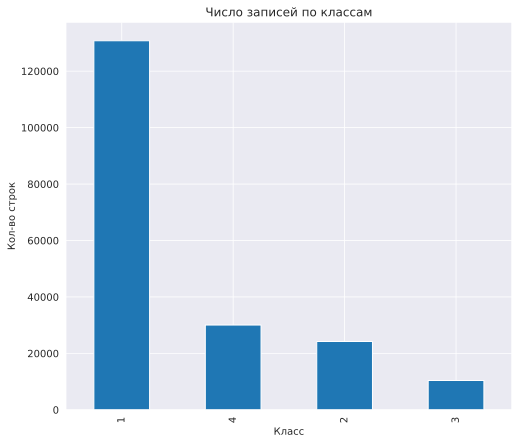

In [ ]:
df_train.Client_class.value_counts().plot.bar(ylabel = 'Кол-во строк', xlabel = 'Класс', title = 'Число записей по классам')

# Новый раздел

In [ ]:
df_train.Client_class.value_counts(normalize=True,  dropna = False)*100

1    66.926801
4    15.369578
2    12.392279
3     5.311342
Name: Client_class, dtype: float64

In [ ]:
df_test.Client_class.value_counts(normalize=True,  dropna = False)*100

1    34.802158
2    31.205036
4    22.751799
3    11.241007
Name: Client_class, dtype: float64

# 4 Объединение данных

In [ ]:
df_train.shape

(195412, 33)

In [ ]:
df_test.shape

(1112, 32)

In [ ]:
#Приведтся объединить два набора, так как у нас не все группы присутствуют в тестовой выборке
df_test['Test'] = 1
df_train['Test'] = 0
df_all = pd.concat([df_test, df_train])

In [ ]:
df_all.shape

(196524, 33)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196524 entries, 0 to 195411
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   population                           196500 non-null  float64       
 1   date of birth                        196524 non-null  datetime64[ns]
 2   gender                               196524 non-null  object        
 3   education                            196524 non-null  object        
 4   position                             196524 non-null  object        
 5   id_nbki                              196524 non-null  object        
 6   issued                               196524 non-null  datetime64[ns]
 7   amount                               196524 non-null  float64       
 8   type_credit                          196524 non-null  object        
 9   status_credit                        196524 non-null  object        
 

# 5 Преобразование исходных данных

In [ ]:
#Создаем новый столбец - Age куда записываем год рождения клиента

df_all['Age'] = df_all['date of birth'].dt.year

df_all = df_all.drop([ 'date of birth'   ], axis='columns')


In [ ]:
#population  - группируем в бакеты

#define function for classifying players based on points
def population_group(row):
 if row['population'] <= 300000:
  val = 1
 elif row['population'] <= 1000000:
  val = 2
 else :
  val = 3
 return val

df_all['population_num'] = df_all.apply (population_group, axis=1)


In [ ]:
# Credit_Term = period - issued   - Срок кредита

#Сделаю колонку срок кредита (пусть будет в днях) ?
df_all['Credit_Term'] =  (df_all['period'] - df_all['issued']).dt.days


#Даты перевожу в число, через разницу дат, что бы их можно было бы нормализовать потом
df_all['issued_num'] = (df_all['issued'] - pd.to_datetime('2000-01-01')).dt.days
df_all['period_num'] = (df_all['period'] - pd.to_datetime('2000-01-01')).dt.days
df_all['date_credit_state_num'] = (df_all['date_credit_state'] - pd.to_datetime('2000-01-01')).dt.days



In [ ]:
# У нас много краткосрочных кредитов, поэтому разумно сгруппировать их по строкам
#define function for classifying players based on points
def CreditTerm_group(row):

 if row['Credit_Term'] <= 15:
  val = 0
 elif  row['Credit_Term'] <= 30:
  val = 1
 elif row['Credit_Term'] <= 90:
  val = 2
 elif row['Credit_Term'] <= 180:
  val = 4
 else :
  val = 5
 return val

df_all['Credit_Term_group'] = df_all.apply (CreditTerm_group, axis=1)


In [ ]:
df_all['Credit_Term_group'].value_counts(normalize=True, sort = False, dropna = True)*100

2    27.563046
4    10.298997
1    39.134660
0    14.201319
5     8.801978
Name: Credit_Term_group, dtype: float64

In [ ]:
#last_payment -  дата последнего платежа
df_all['last_payment'].value_counts()

1900-01-02    14403
1900-02-01     5944
2023-02-10      619
2022-12-15      612
2023-01-13      602
              ...  
2021-01-03        5
2023-05-17        3
2023-05-18        2
2023-05-19        2
2023-05-20        1
Name: last_payment, Length: 871, dtype: int64

In [ ]:
#Сделаю колонку срок в течении котрого были оплаты как разница между полми  .
df_all['Payment_Term'] =  (df_all['last_payment'] - df_all['issued']).dt.days
df_all['Payment_Term'] = df_all['Payment_Term'].fillna(0)

In [ ]:
#Если last_payment пусто, то значит платежей не было, поставим 0 - по дате выдаче кредита
#df_all['Payment_Term_new'] = df_all['Payment_Term'].apply(  lambda x: 0 if x <0 else x)


In [ ]:
df_all.loc[((df_all['Payment_Term'] <0 ) )].head(2)

,population,gender,education,position,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,next_payment,last_payment,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class,status_credit_num,Test,Validation,Age,population_num,Credit_Term,issued_num,period_num,date_credit_state_num,Credit_Term_group,Payment_Term,Payment_Term_group
301,141276.0,Мужской,Среднее,пенсионер,055f370c-7b71-11ed-b80d-3cfdfed12971,2021-02-15,4500.0,Микрокредит,СчетЗакрыт,2021-03-17,328.5,4621.5,0.0,0.0,0.0,1900-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,МФО,0.0,2021-02-18,4500.0,0.0,1,1,1,NaN,1952,1,30,7716,7746,7719,1,-44209.0,0
304,141276.0,Мужской,Среднее,пенсионер,055f370c-7b71-11ed-b80d-3cfdfed12971,2021-04-15,2000.0,Микрокредит,СчетЗакрыт,2021-05-15,328.5,2090.0,0.0,0.0,0.0,1900-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,МФО,0.0,2021-04-20,2000.0,0.0,1,1,1,NaN,1952,1,30,7775,7805,7780,1,-44268.0,0


In [ ]:
# Так же сгрупирую по сроку дату последнго платежа от начала кредита
#define function for classifying players based on points
def PaymentTerm_group(row):

 if row['Payment_Term'] <= 0:
  val = 0
 elif  row['Payment_Term'] <= 30:
  val = 1
 elif row['Payment_Term'] <= 60:
  val = 2
 elif row['Payment_Term'] <= 90:
  val = 3
 elif row['Payment_Term'] <= 180:
  val = 4
 else :
  val = 5
 return val

df_all['Payment_Term_group'] = df_all.apply (PaymentTerm_group, axis=1)
df_all['Payment_Term_group'].value_counts(normalize=True, sort = False, dropna = True)*100

2    13.729112
3     3.998494
1    52.200749
0    20.805093
5     4.072276
4     5.194277
Name: Payment_Term_group, dtype: float64

In [ ]:
df_all.loc[((df_all['Payment_Term_group'] == 5 ) )].head(2)

,population,gender,education,position,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,next_payment,last_payment,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class,status_credit_num,Test,Validation,Age,population_num,Credit_Term,issued_num,period_num,date_credit_state_num,Credit_Term_group,Payment_Term,Payment_Term_group
15,56683.0,Женский,Высшее,муниципальный служащий,1cf9de81-e055-11ed-b80d-3cfdfed12971,2021-05-07,0.00,КредитнаяКарта,ПереданНаОбслуживаниеВДругуюОрганизацию,2099-12-31,0.000,65744.54,0.0,0.0,0.0,2022-12-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,2023-03-27,65669.00,0.0,1,0,1,NaN,1988,1,28727,7797,36524,8486,5,584.0,5
16,56683.0,Женский,Высшее,муниципальный служащий,1cf9de81-e055-11ed-b80d-3cfdfed12971,2021-06-16,106382.98,Потребительский,СчетЗакрыт,2023-02-16,19.854,126814.83,0.0,0.0,0.0,2023-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,2023-02-23,106382.98,0.0,1,1,1,NaN,1988,1,610,7837,8447,8454,5,615.0,5


In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(df_all.gender)
df_all['gender_num'] = le.transform(df_all.gender)



le.fit(df_all.education)
df_all['education_num'] = le.transform(df_all.education)


le.fit(df_all.position)
df_all['position_num'] = le.transform(df_all.position)


le.fit(df_all.type_credit)
df_all['type_credit_num'] = le.transform(df_all.type_credit)


le.fit(df_all.source_information)
df_all['source_information_num'] = le.transform(df_all.source_information)


In [ ]:
le.fit(df_all['id_nbki'])
df_all['id_nbki_num'] = le.transform(df_all['id_nbki'])



In [ ]:
#Убираю колонку с периодом так как мы добавили срок кредита и дату последнего платежа, так как мы их преобразовали в сроки  и получили болшую коррелцию по полям
df_all = df_all.drop([ 'period', 'last_payment'  ], axis='columns')

In [ ]:
df_all = df_all.drop([ 'Credit_Term', 'Payment_Term'  ], axis='columns')

In [ ]:
#Удаляем столбцы, которые были преобразованы в цифру
df_all= df_all.drop(['population',
                      'status_credit',
                      'issued',
                      'date_credit_state',
                      'gender',
                      'education',
                      'position',
                      'type_credit',
                      'source_information',
                      'id_nbki'
                      ],

                     axis='columns')



In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196524 entries, 0 to 195411
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   amount                               196524 non-null  float64
 1   psk                                  196524 non-null  float64
 2   balance                              196524 non-null  float64
 3   current_indebtedness                 196524 non-null  float64
 4   expired                              196524 non-null  float64
 5   next_payment                         196524 non-null  float64
 6   term_indebtedness_body_loan          196524 non-null  float64
 7   term_indebtedness_interest           196524 non-null  float64
 8   term_indebtedness_other              196524 non-null  float64
 9   overdue_indebtedness_body_loan       196524 non-null  float64
 10  overdue_indebtedness_interest        196524 non-null  float64
 11  overdue_indeb

In [ ]:
df_all.isna().sum()

amount                                      0
psk                                         0
balance                                     0
current_indebtedness                        0
expired                                     0
next_payment                                0
term_indebtedness_body_loan                 0
term_indebtedness_interest                  0
term_indebtedness_other                     0
overdue_indebtedness_body_loan              0
overdue_indebtedness_interest               0
overdue_indebtedness_other                  0
actual_payments_24_Months                   0
maximum_amount_overdue_indebtedness         0
amount_principal_debt_repaid                0
availability_support                        0
Client_class                                0
status_credit_num                           0
Test                                        0
Validation                             195255
Age                                         0
population_num                    

# Анализ корреляций

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


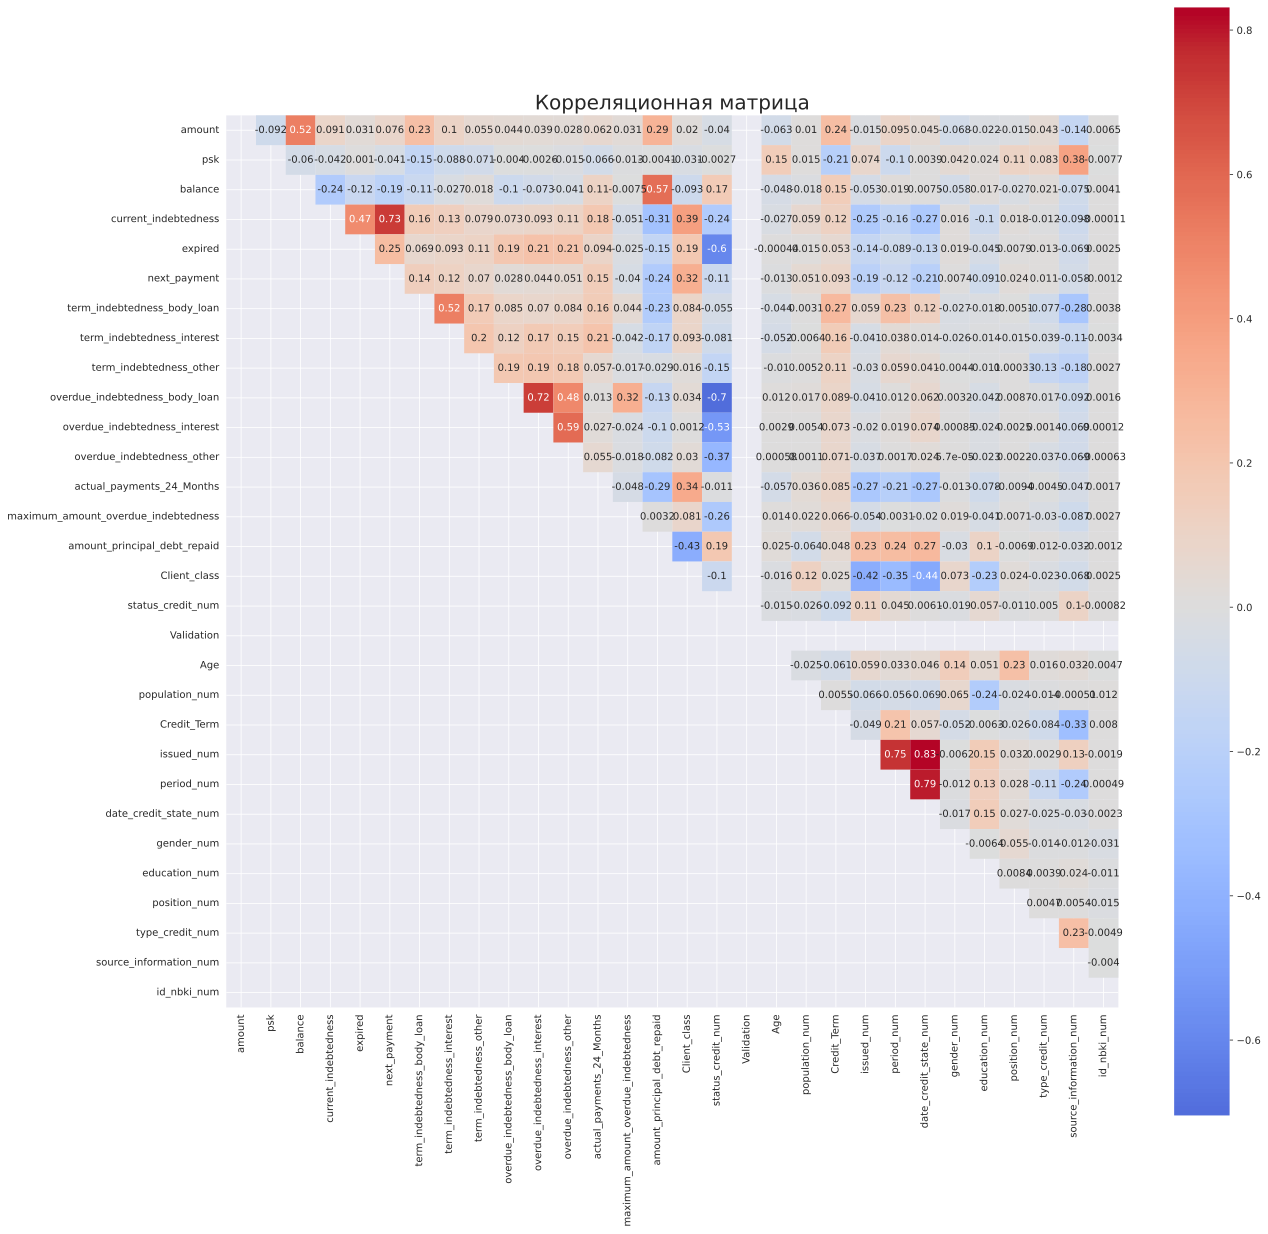

In [ ]:
# Таблица корреляции признаков
#method='spearman'
#method='kendall'

mask_1 = np.tril(df_all.corr(method='kendall'))
plt.figure(figsize=(20,20))
sns.heatmap(df_all.corr(method='kendall'), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

# Взаимна корреляции двух переменных

In [ ]:
sns.pairplot(df_all[['amount', 'balance', 'Credit_Term_group', 'Payment_Term_group',  'Client_class']], diag_kind='kde')

# 6 Финальные преобразования

In [ ]:
# отбор  колонок-категорий
df_object = df_all.select_dtypes(include=['float64'])
object_cols = df_object.columns.values
print(object_cols)

['amount' 'balance' 'current_indebtedness' 'expired'
 'term_indebtedness_body_loan' 'term_indebtedness_other'
 'overdue_indebtedness_body_loan' 'overdue_indebtedness_interest'
 'actual_payments_24_Months' 'maximum_amount_overdue_indebtedness'
 'amount_principal_debt_repaid' 'availability_support' 'Validation']


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196524 entries, 0 to 195411
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   amount                               196524 non-null  float64
 1   balance                              196524 non-null  float64
 2   current_indebtedness                 196524 non-null  float64
 3   expired                              196524 non-null  float64
 4   term_indebtedness_body_loan          196524 non-null  float64
 5   term_indebtedness_other              196524 non-null  float64
 6   overdue_indebtedness_body_loan       196524 non-null  float64
 7   overdue_indebtedness_interest        196524 non-null  float64
 8   actual_payments_24_Months            196524 non-null  float64
 9   maximum_amount_overdue_indebtedness  196524 non-null  float64
 10  amount_principal_debt_repaid         196524 non-null  float64
 11  availability_

In [ ]:
df_all = df_all.drop(['psk',
                      'next_payment',
                      'term_indebtedness_interest',
                      'overdue_indebtedness_other' ],   axis='columns')

KeyError: ignored

In [ ]:
#Сначала преобразу все категориальные столбцы
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df_all[['population_num', 'education_num', 'position_num', 'type_credit_num'  ]]). toarray ())
df_all = df_all.drop(['population_num', 'education_num', 'position_num', 'type_credit_num', ],   axis='columns')
df_all = df_all.join (encoder_df)

In [ ]:
#Сначала преобразу все категориальные столбцы
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df_all[[  ]]). toarray ())
df_all = df_all.drop([ ],   axis='columns')
df_all = df_all.join (encoder_df)

In [ ]:
#Нормализуем все числовые столбцы
scaler = MinMaxScaler()
df_all[['amount', 'balance', 'current_indebtedness', 'expired',
 'term_indebtedness_body_loan', 'term_indebtedness_other',
 'overdue_indebtedness_body_loan', 'overdue_indebtedness_interest',
 'actual_payments_24_Months', 'maximum_amount_overdue_indebtedness',
 'amount_principal_debt_repaid',
 'Age',  'issued_num',  'date_credit_state_num', 'id_nbki_num'

 ]] = scaler.fit_transform(df_all[['amount', 'balance', 'current_indebtedness', 'expired',
 'term_indebtedness_body_loan', 'term_indebtedness_other',
 'overdue_indebtedness_body_loan', 'overdue_indebtedness_interest',
 'actual_payments_24_Months', 'maximum_amount_overdue_indebtedness',
 'amount_principal_debt_repaid',
 'Age',  'issued_num',    'date_credit_state_num', 'id_nbki_num'      ]])




In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196524 entries, 0 to 195411
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   amount                               196524 non-null  float64
 1   balance                              196524 non-null  float64
 2   current_indebtedness                 196524 non-null  float64
 3   expired                              196524 non-null  float64
 4   term_indebtedness_body_loan          196524 non-null  float64
 5   term_indebtedness_other              196524 non-null  float64
 6   overdue_indebtedness_body_loan       196524 non-null  float64
 7   overdue_indebtedness_interest        196524 non-null  float64
 8   actual_payments_24_Months            196524 non-null  float64
 9   maximum_amount_overdue_indebtedness  196524 non-null  float64
 10  amount_principal_debt_repaid         196524 non-null  float64
 11  availability_

# 7 Подготовка к обучению

In [ ]:
df_all.shape

(196524, 51)

In [ ]:
 #Пробуем просто перемешать строки в выборке
 df_all = df_all.sample(frac=1)

In [ ]:
#Выделяю данные обучающей и тестовой выборки
X_train = df_all.loc[((df_all['Validation'] != 1) & (df_all['Test'] != 1) )]
X_train = X_train.drop(['Validation', 'Test'], axis=1)

X_val = df_all.loc[((df_train['Validation'] == 1) )]
X_val = X_val.drop(['Validation', 'Test'], axis=1)


X_test = df_all.loc[((df_all['Test'] == 1) )]
X_test = X_test.drop(['Validation', 'Test'], axis=1)


In [ ]:
Y_train = X_train['Client_class']
Y_test  = X_test['Client_class']
Y_val  = X_val['Client_class']

X_train = X_train.drop('Client_class', axis=1)
X_test = X_test.drop('Client_class', axis=1)
X_val = X_val.drop('Client_class', axis=1)


## Вариант 2

In [ ]:
X_train = X_train.drop(['overdue_indebtedness_interest','amount_principal_debt_repaid', 'date_credit_state_num'
                      ],   axis='columns')

X_val = X_val.drop(['overdue_indebtedness_interest','amount_principal_debt_repaid', 'date_credit_state_num'
                      ],   axis='columns')

X_test = X_test.drop(['overdue_indebtedness_interest','amount_principal_debt_repaid', 'date_credit_state_num'
                      ],   axis='columns')

In [ ]:
X_train.head(10)

,amount,balance,current_indebtedness,expired,term_indebtedness_body_loan,term_indebtedness_other,overdue_indebtedness_body_loan,actual_payments_24_Months,maximum_amount_overdue_indebtedness,availability_support,status_credit_num,Age,issued_num,period_num,Credit_Term_group,Payment_Term_group,gender_num,id_nbki_num,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
133762,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,2,0.483871,0.096663,36525,5,0,1,0.193822,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.001091,0.001730,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.548387,0.733026,8323,0,1,1,0.318042,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
161417,0.001091,0.001847,0.0,0.0,0.001111,0.0,0.0,0.004671,0.0,0.0,1,0.096774,0.078251,7774,2,2,1,0.878757,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
891,0.000779,0.001319,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.274194,0.256617,7926,2,2,0,0.169070,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
146920,0.002259,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,2,0.774194,0.117376,7813,2,0,0,0.203220,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73422,0.000832,0.001527,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.435484,0.565017,8194,2,2,0,0.243603,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36694,0.000560,0.000826,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.483871,0.912543,8480,1,1,1,0.636178,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
184278,0.000935,0.001301,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.903226,0.812428,8398,1,1,1,0.264074,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127238,0.000614,0.000937,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.790323,0.783659,8367,0,1,1,0.724853,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30732,0.000826,0.001390,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,0.951613,0.874568,8452,1,1,0,0.333954,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Обща проверка полей

In [ ]:
print(f"Train shapes: X={X_train.shape}, Y={Y_train.shape}")
print(f"Validation shapes: X={X_val.shape}, Y={Y_val.shape}")
print(f"Test shapes: X={X_test.shape}, Y={Y_test.shape}")

Train shapes: X=(194143, 48), Y=(194143,)
Validation shapes: X=(1269, 48), Y=(1269,)
Test shapes: X=(1112, 48), Y=(1112,)


# Обучение

In [10]:
!pip install autokeras


In [12]:
import autokeras as ak

ImportError: ignored

In [11]:
import tensorflow as tf

In [ ]:
seed = 2
# Устанавливаем начальное значение для генератора случайных чисел TensorFlow
global_generator = tf.random.Generator.from_seed(seed)
tf.random.set_global_generator(global_generator)
tf.random.set_seed(seed)
# Задаем глобальное начальное значение для генератора случайных чисел NumPy
np.random.seed(seed)

tuner="hyperband"
ak_sdc2 = ak.StructuredDataClassifier(
    multi_label=False,                                                       # Мне кажется, что тут нужно поставить False
    loss="categorical_crossentropy",
    metrics=["accuracy", 'AUC'],
    objective="val_accuracy",
    max_trials=50,
    tuner=tuner,
    overwrite=False,
    directory=f"/content/drive/MyDrive/ForColab/Stazh/1 Scoring/AutoMl_2/{tuner}/",
    project_name="SDС_001",
    seed=seed,
)

## Вариант 1

In [ ]:
hist_sdc = ak_sdc2.fit(
    x=X_train.astype("float64").to_numpy(),
    y=pd.get_dummies(Y_train.astype("category")).to_numpy(),
    validation_data=(X_val.astype("float64").to_numpy(), pd.get_dummies(Y_val.astype("category")).to_numpy()),
    epochs=100,
    #batch_size=31 * 3 * 3, #6417 = 3 ∙ 3 ∙ 23 ∙ 31
    #callbacks=[esclb_mae]
    use_multiprocessing=True,
    workers=2,
)

Trial 50 Complete [00h 05m 47s]
val_accuracy: 0.32199788093566895

Best val_accuracy So Far: 0.4771519601345062
Total elapsed time: 04h 36m 25s
Epoch 1/100
6085/6085 [==============================] - 17s 3ms/step - loss: 1.1529 - accuracy: 0.5766 - auc: 0.7716 - val_loss: 1.3550 - val_accuracy: 0.4676 - val_auc: 0.6329
Epoch 2/100
6085/6085 [==============================] - 16s 3ms/step - loss: 0.9391 - accuracy: 0.6819 - auc: 0.8511 - val_loss: 1.3235 - val_accuracy: 0.4920 - val_auc: 0.6659
Epoch 3/100
6085/6085 [==============================] - 15s 2ms/step - loss: 0.8668 - accuracy: 0.6965 - auc: 0.8739 - val_loss: 1.3069 - val_accuracy: 0.4963 - val_auc: 0.6828
Epoch 4/100
6085/6085 [==============================] - 15s 2ms/step - loss: 0.8277 - accuracy: 0.7036 - auc: 0.8854 - val_loss: 1.2947 - val_accuracy: 0.4931 - val_auc: 0.6947
Epoch 5/100
6085/6085 [==============================] - 16s 3ms/step - loss: 0.8022 - accuracy: 0.7109 - auc: 0.8923 - val_loss: 1.2858 - val_a

In [ ]:
best_model = ak_sdc2.export_model()
# Получите архитектуру модели в виде JSON строки
#model_json = best_model.to_json()
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 45)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 45)               91        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               11776     
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
# Сохраните модель в файл
best_model.save("best_model2_SDС_001.tf")

In [ ]:
best_model.compiled_loss.get_config()

{'losses': [{'module': 'keras.losses',
   'class_name': 'CategoricalCrossentropy',
   'config': {'reduction': 'auto',
    'name': 'categorical_crossentropy',
    'from_logits': False,
    'label_smoothing': 0.0,
    'axis': -1},
   'registered_name': None}],
 'total_loss_mean': {'module': 'keras.metrics',
  'class_name': 'Mean',
  'config': {'name': 'loss', 'dtype': 'float32'},
  'registered_name': None}}

In [ ]:
best_model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-04,
 'momentum': 0.0,
 'nesterov': False}

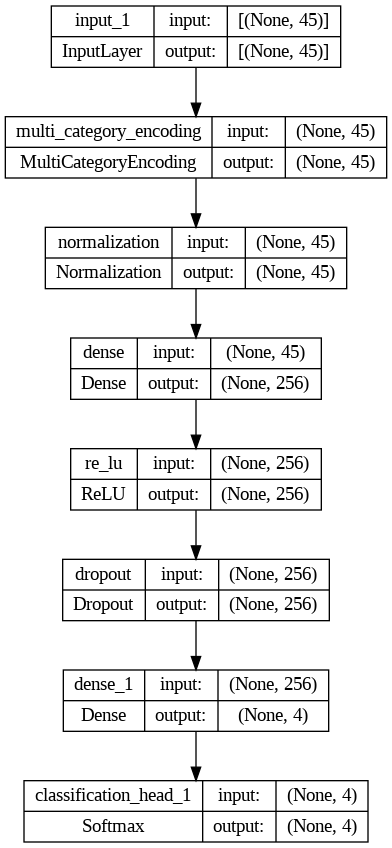

In [ ]:
tf.keras.utils.plot_model(best_model, show_shapes=True)

### Оценка

In [ ]:
ak_sdc2.evaluate(x=X_val.astype("float64").to_numpy(), y=pd.get_dummies(Y_val.astype("category")).to_numpy()   )


30/30 [==============================] - 1s 3ms/step - loss: 1.2284 - accuracy: 0.5058 - auc: 0.7521


[1.2283728122711182, 0.5058448314666748, 0.7521358132362366]

In [ ]:
ak_sdc2.evaluate(x=X_test.astype("float64").to_numpy(), y=pd.get_dummies(Y_test.astype("category")).to_numpy())

35/35 [==============================] - 0s 2ms/step - loss: 1.0329 - accuracy: 0.5926 - auc: 0.8138


[1.0328829288482666, 0.5926259160041809, 0.8137621283531189]

# разное

In [ ]:
# Подсчет количества уникальных значений
education_counts = db['education'].value_counts()

# Вычисление процентного соотношения
education_percentages = round((education_counts / education_counts.sum()) * 100, 3)

# Вывод результатов
print(education_percentages)

In [ ]:
CLMN = "period"
value_for_NA = pd.to_datetime("1900-01-01 00:00:00")
# преобразование в пандосовский тип дат
db[CLMN] = pd.to_datetime(db[CLMN], errors='coerce').fillna(value_for_NA)
print(type(db["period"]))

In [ ]:
# Преобразование столбца 'period' в тип данных datetime, если он еще не является datetime
db['period'] = pd.to_datetime(db['period'])

# Разбивка значений столбца 'period' по годам и подсчет количества
yearly_counts1 = db['period'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "period" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['last_payment'].unique()

In [ ]:
db['id_nbki']= my_label.fit_transform(db['id_nbki'])  # кодировка переменной
print(db['id_nbki'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

In [ ]:
sns.pairplot(db[['amount', 'position', 'status_credit', 'current_indebtedness', 'expired', 'last_payment', 'Defolt']], diag_kind='kde')
Рисуем парные графики